<a href="https://colab.research.google.com/github/codeForX/Perplexity_benchmark/blob/main/LLaMa_2_7b_11_choice_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --upgrade transformers

In [ ]:
import transformers
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import numpy as np

import pandas as pd
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_name = "meta-llama/Llama-2-7b-hf"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)





tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [ ]:
model.to(device)
print(device)

cpu


In [ ]:
def calculate_perplexity(sentence, model, tokenizer):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    input_ids = torch.tensor(tokenizer.encode(sentence)).unsqueeze(0)
    input_ids = input_ids.to(device)

    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)

    loss = outputs[0]

    perplexity = torch.exp(loss).item()

    return perplexity

In [ ]:
import pandas as pd
pre2022 = pd.read_csv('pre2022_300_with_alternatives.csv')
after2022 = pd.read_csv('post2022_300_with_alternatives.csv')


In [ ]:
len(pre2022.dropna()), len(after2022.dropna())

(300, 299)

In [ ]:
pre2022 = pre2022.dropna()
after2022 = after2022.dropna()

In [ ]:
from tqdm import tqdm
def score_dataset(df):
    result = []
    for i, row in tqdm(df.iterrows(), desc='evaluating model...', total=len([x for x in df.iterrows()])):
        scores = []

        for column in df.columns[1:]:
            text = row[column]
            scores.append(float(calculate_perplexity(text,model,tokenizer)))
        result.append(scores)
    return result


In [ ]:
pre2022_scores = score_dataset(pre2022)
sum([min(score) == score[0] for score in pre2022_scores]) / len(pre2022_scores)

evaluating model...: 100%|██████████| 300/300 [1:12:16<00:00, 14.45s/it]


0.35

In [ ]:
post2022_scores = score_dataset(after2022)
sum([min(score) == score[0] for score in post2022_scores]) / len(post2022_scores)

evaluating model...: 100%|██████████| 299/299 [1:15:16<00:00, 15.11s/it]


0.09364548494983277

[3, 4]

In [ ]:
.35 - .094

0.256

In [ ]:
results_df = pd.DataFrame({
    'perplexity_scores': pre2022_scores + post2022_scores,
    'correct': [min(score) == score[0] for score in pre2022_scores] + [min(score) == score[0] for score in post2022_scores],
    'label': ['pre2022'] * len(pre2022_scores) + ['post2022'] * len(post2022_scores)
})

results_df.to_csv('results_llama_2_7B_11_choices.csv')
results_df

,perplexity_scores,correct,label
0,"[18.300546646118164, 27.67442512512207, 20.419...",False,pre2022
1,"[10.683401107788086, 15.356283187866211, 11.01...",True,pre2022
2,"[13.712506294250488, 13.679011344909668, 15.22...",False,pre2022
3,"[12.869799613952637, 13.849038124084473, 8.774...",False,pre2022
4,"[19.915760040283203, 15.547391891479492, 18.99...",False,pre2022
...,...,...,...
594,"[15.871203422546387, 19.374574661254883, 13.18...",False,post2022
595,"[10.430733680725098, 15.524704933166504, 7.567...",False,post2022
596,"[14.81602668762207, 7.965908527374268, 13.6709...",False,post2022
597,"[13.482888221740723, 14.715398788452148, 16.67...",False,post2022


In [ ]:
import pandas as pd
results_df = pd.read_csv('results_llama_2_7B_11_choices.csv')
results_df

,Unnamed: 0,perplexity_scores,correct,label
0,0,"[18.300546646118164, 27.67442512512207, 20.419...",False,pre2022
1,1,"[10.683401107788086, 15.356283187866211, 11.01...",True,pre2022
2,2,"[13.712506294250488, 13.679011344909668, 15.22...",False,pre2022
3,3,"[12.869799613952637, 13.849038124084473, 8.774...",False,pre2022
4,4,"[19.915760040283203, 15.547391891479492, 18.99...",False,pre2022
...,...,...,...,...
594,594,"[15.871203422546387, 19.374574661254883, 13.18...",False,post2022
595,595,"[10.430733680725098, 15.524704933166504, 7.567...",False,post2022
596,596,"[14.81602668762207, 7.965908527374268, 13.6709...",False,post2022
597,597,"[13.482888221740723, 14.715398788452148, 16.67...",False,post2022


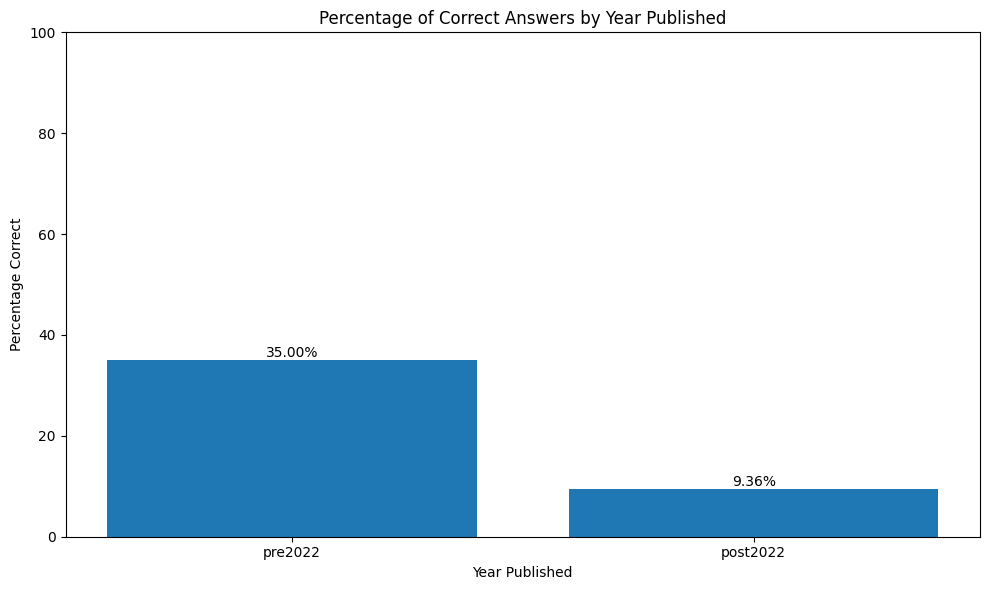

In [ ]:
import matplotlib.pyplot as plt

# Group the data by label and calculate the percentage of correct answers
grouped = results_df.groupby('label')['correct'].mean() * 100


grouped =grouped.iloc[::-1]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(grouped.index, grouped.values)

# Add labels and title
ax.set_xlabel('Year Published')
ax.set_ylabel('Percentage Correct')
ax.set_title('Percentage of Correct Answers by Year Published')

# Set y-axis limit to 100
ax.set_ylim(0, 100)

# Add percentage values on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()
